In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os.path
import numpy as np
import pandas as pd
import math
from mpl_toolkits.mplot3d import Axes3D

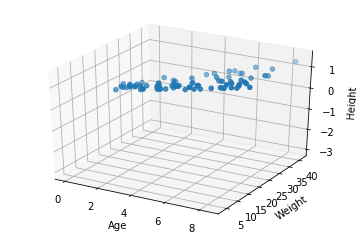

In [2]:
# create df
df = pd.read_csv('input2.csv', header=None, names=['age', 'weight', 'height'], sep=',', error_bad_lines=False)
df['bias'] = 1 # to always multiply by bias

plot = plt.figure().gca(projection='3d')
plot.scatter(df['age'], df['weight'], df['height'])
plot.set_xlabel('Age')
plot.set_ylabel('Weight')
plot.set_zlabel('Height')

# mess around with plot surface
xx = [[0,1,2], [0,1,2]]
yy = [[6,5,4], [6,5,4]]
zz = [[-1,-2,-3], [-1,-2,-3]]
plot.plot_surface(xx,yy,zz)

In [3]:
#get the std dev for a series
def stats(series):
    sm = 0
    mn = series.sum()/series.count()
    for i, value in series.iteritems():
        sm += math.pow(value - mn, 2)
    
    return mn, (math.sqrt(sm/series.count()))

mn_age, std_dev_age = stats(df['age'])
mn_weight, std_dev_weight = stats(df['weight'])

df['age_scaled'] = (df['age'] - mn_age)/std_dev_age
df['weight_scaled'] = (df['weight'] - mn_weight)/std_dev_weight

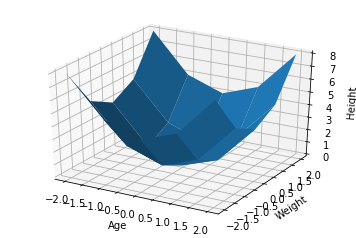

In [4]:
#messing with plots, plot a parabolic surface
fig = plt.figure()
plot = fig.gca(projection='3d')
# plot.scatter(df['age_scaled'], df['weight_scaled'], df['height'])
plot.set_xlabel('Age')
plot.set_ylabel('Weight')
plot.set_zlabel('Height')

# mess around with plot surface
x = np.linspace(-2, 2, 5)
y = np.linspace(-2, 2, 5)
xx, yy = np.meshgrid(x, y)
zz = xx**2 + yy**2
surf = plot.plot_surface(xx,yy,zz)

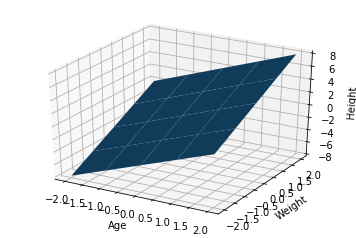

In [5]:
#try to create simple linear plane with fake data
fig = plt.figure()
plot = fig.gca(projection='3d')
# plot.scatter(df['age_scaled'], df['weight_scaled'], df['height'])
plot.set_xlabel('Age')
plot.set_ylabel('Weight')
plot.set_zlabel('Height')

# mess around with plot surface
x = np.linspace(-2, 2, 5)
y = np.linspace(-2, 2, 5)
xx, yy = np.meshgrid(x, y)
zz = xx*2 + yy*2
surf = plot.plot_surface(xx,yy,zz)

In [20]:
#results
results = []

alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
weight_map = ['bias', 'age_scaled', 'weight_scaled']
obs_divisor = 1/(len(df))

for alpha in alphas:
    iters = i = 100 #iterations
    weights = np.zeros(3) #initialize weights to 0
    scalar = alpha * obs_divisor

    while (i > 0):
        i -= 1
        linear_model = lambda row: np.dot(weights, [row[c] for c in ['bias', 'age_scaled', 'weight_scaled']])
        df['est'] = df.apply(linear_model, 1)

        for beta_index in range(len(weights)):
            weights[beta_index] -= (scalar * ((df['est'] - df['height']) * df[weight_map[beta_index]]).sum())
    
    results.append({
        'alpha': alpha,
        'iters': iters,
        'weights': weights
    })

results

[{'alpha': 0.001,
  'iters': 100,
  'weights': array([ 0.10439168,  0.01202819,  0.0086781 ])},
 {'alpha': 0.005,
  'iters': 100,
  'weights': array([ 0.43225727,  0.0457332 ,  0.02983411])},
 {'alpha': 0.01,
  'iters': 100,
  'weights': array([ 0.69512069,  0.06860855,  0.03878004])},
 {'alpha': 0.05,
  'iters': 100,
  'weights': array([ 1.08996918,  0.11200687,  0.0179978 ])},
 {'alpha': 0.1,
  'iters': 100,
  'weights': array([ 1.09643169,  0.12436207,  0.00565764])},
 {'alpha': 0.5,
  'iters': 100,
  'weights': array([ 1.09646081,  0.12861719,  0.00140252])},
 {'alpha': 1,
  'iters': 100,
  'weights': array([ 1.09646081,  0.12861723,  0.00140248])},
 {'alpha': 5,
  'iters': 100,
  'weights': array([ -1.37765459e+72,  -1.85723478e+87,  -1.85723478e+87])},
 {'alpha': 10,
  'iters': 100,
  'weights': array([ -9.45140820e+104,  -1.30612066e+120,  -1.30612066e+120])}]

In [ ]:
#plot some of the results of gradient descent
fig = plt.figure()
plot = fig.gca(projection='3d')
plot.scatter(df['age_scaled'], df['weight_scaled'], df['height'])
plot.set_xlabel('Age')
plot.set_ylabel('Weight')
plot.set_zlabel('Height')

# plot one of more even fits
weights = results[4]['weights']
xx, yy = np.meshgrid(df['age_scaled'], df['weight_scaled'])
zz = weights[0] + (weights[1]*xx) + (weights[2]*yy)
surf = plot.plot_surface(xx,yy,zz, color='red', alpha=0.2)